In [225]:
def cruce_de_medias(ticker, fast=4, medium=9, slow=18):
    import numpy as np
    import yfinance as yf
    data = yf.download(ticker,period='1y', interval='1d')
    data.reset_index(drop = False, inplace=True)
    data['fast'] = data['Close'].ewm(fast).mean()
    data['medium'] = data['Close'].ewm(medium).mean()
    data['slow'] = data['Close'].ewm(slow).mean()
    data['condicion1'] = (data['medium'] > data['slow'])#Condicion de compra
    data['condicion-1'] = data['condicion1'].shift()
    data['condicion2'] = (data['medium'] > data['fast'])#Cerramos posicion
    data['condicion-2'] = data['condicion2'].shift()
    data['condicion3'] = data['medium']< data['slow'] #Short
    data['condicion-3'] = data['condicion3'].shift()
    data['condicion4'] = data['fast']>data['medium']#Cerramos Short
    data['condicion-4'] = data['condicion4'].shift()
    data['condicion5'] = data['condicion1'].shift(2)
    return data

def calculos(data):
    global b
    z = 1
    for i in range(len(data)):                         
        if (data.loc[i]['condicion1']==True and data.loc[i]['condicion-1']==True and data.loc[i]['condicion2']==False and data.loc[i]['condicion5']==False):
            data.loc[i,'orden'] ='Long'
        elif (data.loc[i]['condicion1']==True and data.loc[i]['condicion-1']==True and data.loc[i]['condicion2']==False ):
            data.loc[i,'orden'] =''
        elif(data.loc[i]['condicion-1']==True and data.loc[i]['condicion2']==True and data.loc[i]['condicion5']==True and data.loc[i]['condicion-2']==False):
            data.loc[i,'orden']='Cerramos Long'
        elif(data.loc[i]['condicion3']==True and data.loc[i]['condicion-3']==True and data.loc[i-1]['condicion1']==False and data.loc[i]['condicion5']==True):
            data.loc[i,'orden'] = 'Shorteado'
        elif(data.loc[i]['condicion3']==True and data.loc[i]['condicion-3']==True and data.loc[i-1]['condicion1']==False):
            data.loc[i,'orden'] = ''
        elif(data.loc[i]['condicion4']==True and data.loc[i]['condicion-3']==True and data.loc[i]['condicion1']==True):
            data.loc[i,'orden'] = 'Cerramos Short'
        else:data.loc[i,'orden'] = 'No hay Posicion' 
    for x in range(len(data)):
        if (data.loc[x]['orden']== 'Long'):
            a = data.loc[x]['Adj Close']
        if (data.loc[x]['orden']== 'Cerramos Long'):
            b = data.loc[x]['Adj Close']
            c= (b-a)/a*100
            print('Rendimiento Long:',c)
    for x in range(len(data)):
        if (data.loc[x]['orden']== 'Short'):
            a = data.loc[x]['Adj Close']
        if (data.loc[x]['orden']== 'Cerramos Short'):
            b = data.loc[x]['Adj Close']
            c= (a-b)/a*100
            print('Rendimiento Short:',c)  
    data.dropna(inplace=True)
   
    return data

rta = calculos(cruce_de_medias('fb'))
rta



[*********************100%***********************]  1 of 1 completed
Rendimiento Long: -3.238974984805585
Rendimiento Long: 0.2247950345311777
Rendimiento Long: 8.641375857501224
Rendimiento Long: 8.001073246618642
Rendimiento Long: 20.627628326571948
Rendimiento Long: 27.658408684604147
Rendimiento Short: -1.5089357889547093
Rendimiento Short: -4.089440477709956
Rendimiento Short: -2.5094288152602906


,Date,Open,High,Low,Close,Adj Close,Volume,fast,medium,slow,condicion1,condicion-1,condicion2,condicion-2,condicion3,condicion-3,condicion4,condicion-4,condicion5,orden
2,2019-08-16,183.750000,185.100006,182.360001,183.699997,183.699997,12654600,182.289508,182.138782,182.071587,True,True,False,False,False,False,True,True,False,Long
3,2019-08-19,186.009995,187.500000,184.850006,186.169998,186.169998,9691200,183.604037,183.310988,183.180721,True,True,False,False,False,False,True,True,True,
4,2019-08-20,185.449997,186.000000,182.389999,183.809998,183.809998,10083400,183.665306,183.432843,183.320540,True,True,False,False,False,False,True,True,True,
5,2019-08-21,185.000000,185.899994,183.139999,183.550003,183.550003,8398200,183.634052,183.457847,183.364132,True,True,False,False,False,False,True,True,True,
6,2019-08-22,183.429993,184.110001,179.910004,182.039993,182.039993,10821400,183.230638,183.186073,183.142954,True,True,False,False,False,False,True,True,True,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,2020-08-10,268.040009,273.859985,259.690002,263.000000,263.000000,30248800,254.564846,247.721017,240.984251,True,True,False,False,False,False,True,True,True,
250,2020-08-11,260.190002,265.920013,255.130005,256.130005,256.130005,28238300,254.877878,248.561916,241.781397,True,True,False,False,False,False,True,True,True,
251,2020-08-12,258.970001,263.899994,258.109985,259.890015,259.890015,21428300,255.880305,249.694726,242.734483,True,True,False,False,False,False,True,True,True,
252,2020-08-13,261.549988,265.160004,259.570007,261.299988,261.299988,17352600,256.964242,250.855252,243.711616,True,True,False,False,False,False,True,True,True,


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


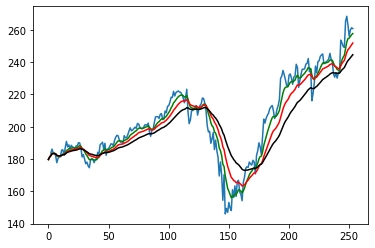

In [202]:
cruce_de_medias('fb')
rta['Adj Close'].plot()
ema_ggal=cruce_de_medias('fb')
ema_ggal.fast.plot(color='g')
ema_ggal.medium.plot(color='r')
ema_ggal.slow.plot(color='k')

In [176]:
retorno(rta)

KeyError: 0